# Environment set-up

In [44]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [45]:
import pathlib
path = pathlib.Path('/content/gdrive/MyDrive/Fyp')
try:
    path.mkdir()
    %cd '/content/gdrive/MyDrive/Fyp'
    ! git clone https://github.com/TanShengRong/FYP-RPI-RF-Sensing
    %cd './FYP-RPI-RF-Sensing/dataset/'
    print('Project folder created in your GoogleDrive')
except FileExistsError:
    %cd '/content/gdrive/MyDrive/Fyp/FYP-RPI-RF-Sensing/'
    ! git pull
    %cd './dataset/'

/content/gdrive/MyDrive/Fyp/FYP-RPI-RF-Sensing
Already up to date.
/content/gdrive/MyDrive/Fyp/FYP-RPI-RF-Sensing/dataset


In [46]:
pwd

'/content/gdrive/My Drive/Fyp/FYP-RPI-RF-Sensing/dataset'

In [47]:
ls

gestureA/  gestureD/  gestureG/            net2.pth  specifications.txt
gestureB/  gestureE/  gestureH/            net3.pth
gestureC/  gestureF/  gestureInitial.jpeg  net.pth


# Preliminary findings

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

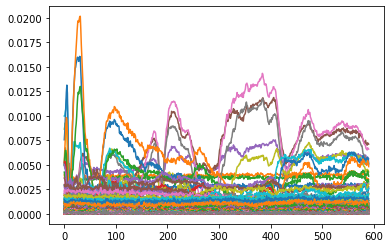

'\n>> ii = ans(:, 1:138);\n>> qq = ans(:, 139:end-1);\n>> iq = ii+j*qq;\n>> imagesc(abs(iq))\n>> plot(abs(iq(1,:)))\n'

In [49]:
df = pd.read_csv("./gestureA/degree0/1.csv") # shape = duration(millisecond?) x readings
shape = df.shape # (row,col)
tmp = [ _ for _ in range(138)]
ii = df.iloc[:, 0:138]
ii.columns = tmp
qq = df.iloc[:, 138:shape[1]-1 ]
qq.columns = tmp
iq = ii.add(qq, fill_value=None) # fill_value defaults as None
iq = abs(iq)
# iq.plot(kind="hexbin", x=)
iq.plot(legend=None)
plt.show()
"""
>> ii = ans(:, 1:138);
>> qq = ans(:, 139:end-1);
>> iq = ii+j*qq;
>> imagesc(abs(iq))
>> plot(abs(iq(1,:)))
"""

Doesn't seem to make much sense...

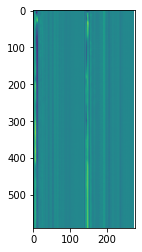

In [50]:
df = pd.read_csv("./gestureA/degree0/1.csv") # shape = duration(millisecond?) x readings
plt.imshow(df)

real part:      -0.002386  -0.000261  -0.000187  ...  -0.000036.1  -0.000046  0.000002.1
0    -0.005643  -0.001515  -0.000928  ...     0.000028  -0.000072    0.000075
1    -0.005669  -0.001547  -0.001125  ...    -0.000008   0.000040    0.000020
2    -0.005537  -0.001585  -0.001039  ...     0.000133   0.000132    0.000153
3    -0.005658  -0.001485  -0.000915  ...     0.000214   0.000157    0.000177
4    -0.005567  -0.001344  -0.000692  ...     0.000138   0.000191    0.000280
..         ...        ...        ...  ...          ...        ...         ...
586  -0.005643  -0.001698  -0.000864  ...    -0.000110  -0.000053    0.000039
587  -0.005464  -0.001522  -0.000700  ...     0.000037   0.000015    0.000037
588  -0.005358  -0.001482  -0.000734  ...     0.000160   0.000102    0.000201
589  -0.005195  -0.001356  -0.000842  ...     0.000124  -0.000055   -0.000042
590  -0.005188  -0.001158  -0.000578  ...    -0.000071  -0.000035    0.000052

[591 rows x 138 columns]


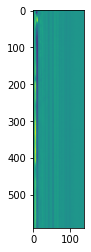

In [51]:
real = df.iloc[:, 0:138]
print('real part: {}'.format(real))
plt.imshow(real)

imag part:      0.001698  -0.000387  -0.000508  ...  0.000006.2  -0.000041  -0.000030.2
0    0.002730  -0.002448  -0.003332  ...    0.000045   0.000075     0.000064
1    0.002854  -0.002074  -0.002728  ...   -0.000035  -0.000011     0.000062
2    0.003109  -0.001813  -0.002556  ...    0.000195   0.000081     0.000017
3    0.003080  -0.001986  -0.002713  ...    0.000012  -0.000035    -0.000068
4    0.002880  -0.002185  -0.002834  ...    0.000025   0.000096     0.000191
..        ...        ...        ...  ...         ...        ...          ...
586  0.002989  -0.001958  -0.002530  ...   -0.000051   0.000007    -0.000002
587  0.003234  -0.001858  -0.002395  ...    0.000170   0.000173     0.000079
588  0.003043  -0.002138  -0.002766  ...    0.000266   0.000188     0.000173
589  0.002851  -0.002227  -0.002652  ...    0.000141   0.000046     0.000057
590  0.002629  -0.002325  -0.002680  ...   -0.000063  -0.000087    -0.000070

[591 rows x 138 columns]


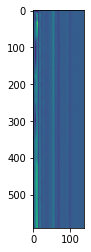

In [52]:
imag = df.iloc[:, 138:277-1 ]
print('imag part: {}'.format(imag))
plt.imshow(imag)

In [53]:
df = pd.DataFrame({'wspd':[10.23,2.4,30.6], 'wdir':[2.3,7.8,4]})
df['com'] = df['wspd'] + df['wdir'] * 1j
print (df)

    wspd  wdir                  com
0  10.23   2.3  10.230000+2.300000j
1   2.40   7.8   2.400000+7.800000j
2  30.60   4.0  30.600000+4.000000j


In [54]:
real.iloc[0]

-0.002386     -0.005643
-0.000261     -0.001515
-0.000187     -0.000928
0.000144       0.000789
0.000442       0.002431
                 ...   
-0.000004.1    0.000048
-0.000010      0.000100
-0.000036.1    0.000028
-0.000046     -0.000072
0.000002.1     0.000075
Name: 0, Length: 138, dtype: float64

# Deep Learning

In [55]:
ls

gestureA/  gestureD/  gestureG/            net2.pth  specifications.txt
gestureB/  gestureE/  gestureH/            net3.pth
gestureC/  gestureF/  gestureInitial.jpeg  net.pth


In [56]:
pwd

'/content/gdrive/My Drive/Fyp/FYP-RPI-RF-Sensing/dataset'

## Dataloading

In [57]:
#=== Params ===#
DATASET_DIR = '/content/gdrive/MyDrive/Fyp/FYP-RPI-RF-Sensing/dataset/'
GESTURE_DEGREE = "degree0"
DATA_ROW_LOWER_LIMIT = 200
DATA_ROW_UPPER_LIMIT = 400 #540 # 12s -> 600 (3 transitions)
BATCH_SIZE = 30
NUM_WORKERS = 0 # 2; 0 is default
SHUFFLE = True
cols = [i for i in range(138)]

In [58]:
#=== Dataloading ===#
import os
from torch.utils.data import Dataset
import numpy as np
from torch.utils.data import DataLoader


class GestureDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.root_dir = root_dir
        # self.root_dir = '/content/gdrive/MyDrive/Fyp/FYP-RPI-RF-Sensing/dataset/'
        self.gesture_list = self.getGestureList()
        self.gesturePerFolder = 30 # change this if increasing no. of sample per gesture per degree
        self.gestureDegree = GESTURE_DEGREE
        self.transform = transform
    
    def __len__(self):
        return len(self.gesture_list) * self.gesturePerFolder
        
    def __getitem__(self, idx):
        item_gesture_type_idx = idx // self.gesturePerFolder
        item_gesture_type = self.gesture_list[item_gesture_type_idx],
        item_idx = idx % self.gesturePerFolder
        # print(item_gesture_type_idx, item_gesture_type[0], item_idx)
        item_gesture_path = os.path.join(
            self.root_dir,   
            item_gesture_type[0],
            self.gestureDegree,
            str(item_idx+1) + ".csv"
            )
        item_gesture_df = pd.read_csv(item_gesture_path, header=0) 
        real = item_gesture_df.iloc[ DATA_ROW_LOWER_LIMIT:DATA_ROW_UPPER_LIMIT, :138 ]
        real.columns = cols
        imag = item_gesture_df.iloc[ DATA_ROW_LOWER_LIMIT:DATA_ROW_UPPER_LIMIT, 138:277-1 ] * 1j
        imag.columns = cols
        comp = abs(real.add(imag, fill_value=(0)))
        
        features = comp.values
        features = torch.FloatTensor(features)
        features = features.view(1, DATA_ROW_UPPER_LIMIT-DATA_ROW_LOWER_LIMIT, 276//2)
        targets = np.zeros(len(self.gesture_list))
        targets[item_gesture_type_idx] = 1
        targets = torch.FloatTensor(targets)
        sample = {'features': features, 'targets': targets}
        # if self.transform:
        #     sample = self.transform(sample)
        return sample
        
    def getGestureList(self):
        gestureList = []
        for _, dirnames, filenames in os.walk(self.root_dir):
            if any("gesture" in dirname for dirname in dirnames):
                gestureList += dirnames
        print(gestureList)
        return gestureList

train_data = GestureDataset(DATASET_DIR)

['gestureA', 'gestureB', 'gestureC', 'gestureE', 'gestureF', 'gestureG', 'gestureH', 'gestureD']


In [59]:
#=== printing some data from a dataset ===#
import torch 

for i in range(len(train_data)):
    sample = train_data[i]

    print(i)
    print(sample)
    print(sample['features'].shape)
    print(sample['targets'].shape)

    if i == 40:
        break

0
{'features': tensor([[[6.0333e-03, 2.9047e-03, 2.9949e-03,  ..., 7.4673e-05,
          8.0399e-05, 2.0557e-04],
         [6.2464e-03, 2.9753e-03, 3.1318e-03,  ..., 1.1800e-04,
          3.1401e-05, 1.1031e-04],
         [6.1536e-03, 2.7510e-03, 2.9495e-03,  ..., 8.0753e-05,
          1.5121e-04, 1.4132e-04],
         ...,
         [6.1682e-03, 2.9304e-03, 3.0495e-03,  ..., 7.7466e-05,
          1.2389e-04, 1.2007e-04],
         [6.1195e-03, 2.9122e-03, 2.9781e-03,  ..., 1.0057e-04,
          1.4677e-04, 2.1000e-04],
         [6.1825e-03, 2.9477e-03, 3.0721e-03,  ..., 1.1035e-04,
          5.1614e-05, 7.3246e-05]]]), 'targets': tensor([1., 0., 0., 0., 0., 0., 0., 0.])}
torch.Size([1, 200, 138])
torch.Size([8])
1
{'features': tensor([[[6.8795e-03, 2.2645e-03, 2.5682e-03,  ..., 3.1765e-05,
          6.7052e-05, 9.1788e-05],
         [7.0770e-03, 2.3889e-03, 2.5912e-03,  ..., 7.0576e-05,
          4.8166e-05, 4.4598e-05],
         [7.0217e-03, 2.4180e-03, 2.7356e-03,  ..., 1.7857e-04,
  

In [60]:
dataloader = DataLoader(train_data,
                            batch_size=BATCH_SIZE, 
                            shuffle=SHUFFLE,
                            num_workers=NUM_WORKERS)

In [61]:
#=== printing some data from a batch ===#
for i_batch, sample_batched in enumerate(dataloader):
    # print(i_batch, sample_batched['image'].size(),
    #       sample_batched['landmarks'].size())
    
    # observe 4th batch and stop.
    if i_batch == 3:
        print()
        print(sample_batched['features'])
        print(sample_batched['targets'])
        break


tensor([[[[7.2372e-03, 4.9388e-03, 3.8141e-03,  ..., 1.3342e-04,
           8.4758e-05, 1.0279e-04],
          [7.1829e-03, 4.8570e-03, 3.8386e-03,  ..., 1.0469e-04,
           1.2051e-04, 2.0674e-04],
          [7.3203e-03, 4.9344e-03, 3.7809e-03,  ..., 8.7710e-05,
           3.1064e-05, 1.0440e-04],
          ...,
          [7.2859e-03, 4.8972e-03, 3.7907e-03,  ..., 1.3345e-04,
           9.6005e-05, 5.2345e-05],
          [7.2182e-03, 4.7916e-03, 3.6176e-03,  ..., 9.6540e-05,
           8.3169e-05, 1.4340e-04],
          [7.2071e-03, 4.7930e-03, 3.5035e-03,  ..., 1.5697e-04,
           1.0837e-04, 1.2788e-04]]],


        [[[6.8455e-03, 4.3074e-03, 4.4910e-03,  ..., 7.3348e-05,
           8.9107e-05, 1.2300e-04],
          [7.1225e-03, 4.4393e-03, 4.5999e-03,  ..., 2.2361e-05,
           6.0407e-05, 4.2059e-05],
          [7.0232e-03, 4.3606e-03, 4.5410e-03,  ..., 1.0679e-04,
           1.3793e-04, 2.0319e-04],
          ...,
          [7.0118e-03, 4.6475e-03, 4.7342e-03,  ..., 7.8

In [62]:
# https://ieeexplore.ieee.org.remotexs.ntu.edu.sg/document/8249172


## 2D CNN - FCNN

In [75]:
#== MODEL ==#
import torch.nn as nn
import torch.nn.functional as F


class Net2(nn.Module):

    def __init__(self):
        super(Net2, self).__init__()
        '''
        conv2D, input should be in (N, C, H, W) format. 
        N is the number of samples/batch_size. C is the channels. H and W are height and width resp.
        '''
        self.conv1 = nn.Conv2d(1, 8, 2, 5, padding=1)
        self.conv2 = nn.Conv2d(8, 17, 2, 5, padding=1)

        self.fc1 = nn.Linear(34, 8)

    def forward(self, x):
        # print('before norm', x.shape)
# # inp is shape (N, C, H, W)
# n_chans = inp.shape[1]
# running_mu = torch.zeros(n_chans) # zeros are fine for first training iter
# running_std = torch.ones(n_chans) # ones are fine for first training iter
# x = nn.functional.batch_norm(inp, running_mu, running_std, training=True, momentum=0.9)
# # running_mu and running_std now have new values
        n_chans = x.shape[1]
        running_mu = torch.zeros(n_chans) # zeros are fine for first training iter
        running_std = torch.ones(n_chans) # ones are fine for first training iter
        x = F.batch_norm(x, running_mu, running_std, training=True, momentum=0.9)
        print('after norm', x.shape)
        print(x)

        x = self.conv1(x)
        # print('conv1', x.shape)

        # x = F.relu(x)
        x = F.tanh(x)
        
        x = F.max_pool2d(x, 2)
        # print('maxpool', x.shape)
        x = self.conv2(x)
        # print('conv2', x.shape)
        
        # x = F.relu(x)
        x = F.tanh(x)

        x = F.max_pool2d(x, 2)
        # print('maxpool', x.shape)

        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        # print('fc1', x)

        # x = F.softmax(x, dim=1)
        x = F.tanh(x)

        return x

net2 = Net2()
print(net2)

Net2(
  (conv1): Conv2d(1, 8, kernel_size=(2, 2), stride=(5, 5), padding=(1, 1))
  (conv2): Conv2d(8, 17, kernel_size=(2, 2), stride=(5, 5), padding=(1, 1))
  (fc1): Linear(in_features=34, out_features=8, bias=True)
)


In [76]:
for i_batch, sample_batched in enumerate(dataloader):
    if i_batch == 1:
        print(sample_batched)
        print(sample_batched['features'].shape)

        output = net2(sample_batched['features'])
        print('out', output.shape)
        print(output)

        target = sample_batched['targets']
        # target = target.view(1, -1)  # make it the same shape as output
        criterion = nn.MSELoss()

        loss = criterion(output, target)
        print('loss', loss)
        print(loss.grad_fn)  # MSELoss
        print(loss.grad_fn.next_functions[0][0])  # Linear
        print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

        break
#=== The learnable parameters of a model are returned by net.parameters() ===#
params = list(net2.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

{'features': tensor([[[[5.0875e-03, 7.0687e-03, 6.5901e-03,  ..., 3.7336e-05,
           4.3267e-05, 6.1074e-05],
          [5.0837e-03, 7.1547e-03, 6.7123e-03,  ..., 1.7659e-04,
           1.3086e-04, 1.7778e-04],
          [4.9501e-03, 7.0212e-03, 6.5139e-03,  ..., 1.7400e-04,
           8.8233e-05, 1.3132e-04],
          ...,
          [5.1419e-03, 7.1669e-03, 6.6745e-03,  ..., 1.8217e-04,
           9.8843e-05, 6.9029e-05],
          [4.9614e-03, 7.0120e-03, 6.6228e-03,  ..., 6.3246e-05,
           8.6313e-05, 1.1000e-04],
          [4.9735e-03, 7.1472e-03, 6.7349e-03,  ..., 1.1814e-04,
           2.1000e-05, 5.7201e-05]]],


        [[[6.5950e-03, 4.4469e-03, 4.3416e-03,  ..., 8.3600e-05,
           3.2696e-05, 9.5708e-05],
          [6.4521e-03, 4.3727e-03, 4.3919e-03,  ..., 6.8118e-05,
           9.8005e-05, 7.0064e-05],
          [6.6732e-03, 4.3741e-03, 4.4650e-03,  ..., 4.8374e-05,
           5.1740e-05, 8.0623e-05],
          ...,
          [6.4502e-03, 4.2886e-03, 4.3685e-0

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1698: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [72]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.SGD(net2.parameters(), lr=0.001, momentum=0.5)

for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(dataloader):
        inputs = data['features']
        labels = data['targets']

        print(labels)

        optimizer.zero_grad() # zero the gradient buffers

        # forward + backward + optimize
        outputs = net2(inputs)
        # print(outputs.shape)
        # print(labels.shape)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step() # Does the update

        # print statistics
        running_loss += loss.item()
        if i % 20 == 19:    # print every 20 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 20))
            running_loss = 0.0
        
        break
    print('epoch', epoch)
print('Finished Training')

tensor([[0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1698: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


tensor([[0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0

In [73]:
torch.save(net2.state_dict(), '/content/gdrive/My Drive/Fyp/FYP-RPI-RF-Sensing/dataset/net2.pth')

In [74]:
for i_batch, sample_batched in enumerate(dataloader):
    net2 = Net2()
    net2.load_state_dict(torch.load('/content/gdrive/My Drive/Fyp/FYP-RPI-RF-Sensing/dataset/net2.pth'))
    
    # if i_batch == 1:
        # print(sample_batched)
    _, actual = torch.max(sample_batched['targets'], 1)
    print('actual', actual)

    outputs = net2(sample_batched['features'])
    # print('outputs', outputs)
    _, predicted = torch.max(outputs, 1)
    print('predicted', predicted)

actual tensor([1, 3, 3, 6, 2, 4, 3, 5, 3, 1, 1, 0, 3, 5, 3, 1, 4, 7, 3, 7, 7, 5, 0, 1,
        4, 2, 7, 5, 5, 0])
predicted tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3])


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1698: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


actual tensor([2, 2, 4, 5, 3, 6, 6, 0, 0, 4, 7, 1, 1, 2, 1, 4, 5, 3, 2, 5, 0, 5, 1, 7,
        7, 1, 7, 1, 4, 3])
predicted tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3])
actual tensor([6, 3, 6, 7, 5, 3, 1, 4, 1, 3, 5, 7, 4, 2, 0, 5, 6, 2, 6, 2, 4, 0, 2, 5,
        0, 2, 5, 2, 1, 3])
predicted tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3])
actual tensor([4, 2, 2, 2, 7, 6, 0, 3, 7, 6, 4, 5, 1, 6, 6, 2, 7, 4, 1, 7, 3, 4, 3, 5,
        2, 4, 0, 1, 7, 6])
predicted tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3])
actual tensor([5, 5, 6, 5, 0, 2, 7, 6, 6, 4, 6, 6, 5, 5, 3, 7, 3, 0, 6, 5, 6, 6, 2, 4,
        3, 3, 7, 2, 6, 1])
predicted tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3])
actual tensor([5, 2, 4, 6, 0, 2, 2, 3, 1, 4, 3, 1, 0, 0, 0, 5, 7, 4, 3, 0, 5

KeyboardInterrupt: ignored

## 3D CNN - FCNN

In [184]:
#== MODEL ==#
import torch.nn as nn
import torch.nn.functional as F


class Net3(nn.Module):

    def __init__(self):
        super(Net3, self).__init__()
        '''
        conv2D, input should be in (N, C, H, W) format. 
        N is the number of samples/batch_size. C is the channels. H and W are height and width resp.
        '''
        self.conv1 = nn.Conv3d(1, 7, 3, 5, padding=1)
        self.conv2 = nn.Conv3d(7, 11, 3, 5, padding=1)
        
        self.fc1 = nn.Linear(528, 8)

    def forward(self, x):
        x = self.conv1(x)
        # print('conv1', x.shape)
        x = F.relu(x)
        x = F.max_pool3d(x, 1)
        # print('maxpool', x.shape)
        x = self.conv2(x)
        # print('conv2', x.shape)

        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        # print('fc1', x.shape)
        x = F.softmax(x, dim=1)

        return x

net3 = Net3()
print(net3)

Net3(
  (conv1): Conv3d(1, 7, kernel_size=(3, 3, 3), stride=(5, 5, 5), padding=(1, 1, 1))
  (conv2): Conv3d(7, 11, kernel_size=(3, 3, 3), stride=(5, 5, 5), padding=(1, 1, 1))
  (fc1): Linear(in_features=528, out_features=8, bias=True)
)


In [185]:
for i_batch, sample_batched in enumerate(dataloader):
    if i_batch == 1:
        print(sample_batched)
        print(sample_batched['features'].shape)

        output = net3(sample_batched['features'].view(1,1,1,200,138))
        print('out', output.shape)
        print(output)

        target = sample_batched['targets']
        # target = target.view(1, -1)  # make it the same shape as output
        criterion = nn.MSELoss()

        loss = criterion(output, target)
        print('loss', loss)
        print(loss.grad_fn)  # MSELoss
        print(loss.grad_fn.next_functions[0][0])  # Linear
        print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

        break
#=== The learnable parameters of a model are returned by net.parameters() ===#
params = list(net3.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

{'features': tensor([[[[5.0916e-03, 7.3965e-03, 7.0650e-03,  ..., 1.8392e-04,
           2.5121e-04, 1.8860e-04],
          [5.2062e-03, 7.3511e-03, 7.0278e-03,  ..., 4.9163e-05,
           1.1510e-04, 1.3372e-04],
          [5.3654e-03, 7.6009e-03, 7.2033e-03,  ..., 8.4404e-05,
           8.9627e-05, 4.3829e-05],
          ...,
          [5.2795e-03, 7.4753e-03, 7.1025e-03,  ..., 1.8585e-04,
           4.5100e-05, 6.6219e-05],
          [5.3381e-03, 7.4924e-03, 7.1042e-03,  ..., 6.7417e-05,
           2.3431e-05, 9.7739e-05],
          [5.2337e-03, 7.3928e-03, 7.0486e-03,  ..., 4.8754e-05,
           7.4967e-05, 3.1385e-05]]]]), 'targets': tensor([[0., 0., 0., 1., 0., 0., 0., 0.]])}
torch.Size([1, 1, 200, 138])
out torch.Size([1, 8])
tensor([[0.1284, 0.1254, 0.1261, 0.1223, 0.1257, 0.1200, 0.1210, 0.1311]],
       grad_fn=<SoftmaxBackward>)
loss tensor(0.1101, grad_fn=<MseLossBackward>)
6
torch.Size([7, 1, 3, 3, 3])


In [187]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.SGD(net3.parameters(), lr=0.001, momentum=0.5)

for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(dataloader):
        inputs = data['features'].view(1,1,1,200,138)
        labels = data['targets']

        optimizer.zero_grad() # zero the gradient buffers

        # forward + backward + optimize
        outputs = net3(inputs)
        # print(outputs.shape)
        # print(labels.shape)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step() # Does the update

        # print statistics
        running_loss += loss.item()
        if i % 20 == 19:    # print every 20 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 20))
            running_loss = 0.0
print('Finished Training')

[1,    20] loss: 0.110
[1,    40] loss: 0.109
[1,    60] loss: 0.110
[1,    80] loss: 0.109
[1,   100] loss: 0.109
[1,   120] loss: 0.109
[1,   140] loss: 0.109
[1,   160] loss: 0.110
[1,   180] loss: 0.110
[1,   200] loss: 0.109
[1,   220] loss: 0.110
[1,   240] loss: 0.109
[2,    20] loss: 0.109
[2,    40] loss: 0.109
[2,    60] loss: 0.109
[2,    80] loss: 0.109
[2,   100] loss: 0.109
[2,   120] loss: 0.109
[2,   140] loss: 0.109
[2,   160] loss: 0.109
[2,   180] loss: 0.110
[2,   200] loss: 0.109
[2,   220] loss: 0.109
[2,   240] loss: 0.109
[3,    20] loss: 0.109
[3,    40] loss: 0.110
[3,    60] loss: 0.109
[3,    80] loss: 0.109
[3,   100] loss: 0.109
[3,   120] loss: 0.109
[3,   140] loss: 0.109
[3,   160] loss: 0.109
[3,   180] loss: 0.110
[3,   200] loss: 0.110
[3,   220] loss: 0.109
[3,   240] loss: 0.109
[4,    20] loss: 0.109
[4,    40] loss: 0.109
[4,    60] loss: 0.109
[4,    80] loss: 0.109
[4,   100] loss: 0.110
[4,   120] loss: 0.109
[4,   140] loss: 0.110
[4,   160] 

In [188]:
torch.save(net3.state_dict(), '/content/gdrive/My Drive/Fyp/FYP-RPI-RF-Sensing/dataset/net3.pth')

In [190]:
for i_batch, sample_batched in enumerate(dataloader):
    net3 = Net3()
    net3.load_state_dict(torch.load('/content/gdrive/My Drive/Fyp/FYP-RPI-RF-Sensing/dataset/net3.pth'))
    
    # if i_batch == 1:
        # print(sample_batched)
    _, actual = torch.max(sample_batched['targets'], 1)
    print('actual', actual)

    outputs = net3(sample_batched['features'].view(1,1,1,200,138))
    # print('outputs', outputs)
    _, predicted = torch.max(outputs, 1)
    print('predicted', predicted)
    if (predicted == actual):
        print('correct!')
        # break

actual tensor([2])
predicted tensor([7])
actual tensor([6])
predicted tensor([7])
actual tensor([4])
predicted tensor([7])
actual tensor([2])
predicted tensor([7])
actual tensor([2])
predicted tensor([7])
actual tensor([2])
predicted tensor([7])
actual tensor([4])
predicted tensor([7])
actual tensor([0])
predicted tensor([7])
actual tensor([0])
predicted tensor([7])
actual tensor([1])
predicted tensor([7])
actual tensor([3])
predicted tensor([7])
actual tensor([7])
predicted tensor([7])
correct!
actual tensor([0])
predicted tensor([7])
actual tensor([7])
predicted tensor([7])
correct!
actual tensor([0])
predicted tensor([7])
actual tensor([6])
predicted tensor([7])
actual tensor([5])
predicted tensor([7])
actual tensor([0])
predicted tensor([7])
actual tensor([2])
predicted tensor([7])
actual tensor([6])
predicted tensor([7])
actual tensor([1])
predicted tensor([7])
actual tensor([2])
predicted tensor([7])
actual tensor([1])
predicted tensor([7])
actual tensor([4])
predicted tensor([7]

# Conclusions

Both 2d and 3d models seem to be skewed towards a particular gesture. 